# Import des librairies et de la base 

In [42]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [43]:
R = input("On est en local ? (Y)")
R = R.upper()

if R == 'Y':
    Path = 'G:/Mon Drive/Colab Notebooks/Projet S3/'
else:
    from google.colab import drive
    drive.mount('/content/drive')
    Path = '/content/drive/MyDrive/Colab Notebooks/Projet S3/'

# Knn

## Knn classique

In [44]:
Pathdata = Path + 'train.csv'
data = pd.read_csv(Pathdata)

# Transforme certaines colonnes en catégorie : YearBuilt, YearRemodAdd, MoSold, YrSold, GarageYrBlt
data['YearBuilt'] = data['YearBuilt'].astype('object')
data['YearRemodAdd'] = data['YearRemodAdd'].astype('object')
data['MoSold'] = data['MoSold'].astype('object')
data['YrSold'] = data['YrSold'].astype('object')
data['GarageYrBlt'] = data['GarageYrBlt'].astype('object')

# Ajustement de la base
data['Alley'] = data['Alley'].fillna('No alley')
data['BsmtQual'] = data['BsmtQual'].fillna('No Basement')
data['BsmtCond'] = data['BsmtCond'].fillna('No Basement')
data['BsmtExposure'] = data['BsmtExposure'].fillna('No Basement')
data['BsmtFinType1'] = data['BsmtFinType1'].fillna('No Basement')
data['BsmtFinType2'] = data['BsmtFinType2'].fillna('No Basement')
data['FireplaceQu'] = data['FireplaceQu'].fillna('No Fireplace')
data['GarageType'] = data['GarageType'].fillna('No Garage')
data['GarageFinish'] = data['GarageFinish'].fillna('No Garage')
data['GarageQual'] = data['GarageQual'].fillna('No Garage')
data['GarageCond'] = data['GarageCond'].fillna('No Garage')
data['GarageYrBlt'] = data['GarageYrBlt'].fillna('No Garage')
data['PoolQC'] = data['PoolQC'].fillna('No Pool')
data['Fence'] = data['Fence'].fillna('No Fence')
data['MiscFeature'] = data['MiscFeature'].fillna('No feature')
data['LotFrontage'] = data['LotFrontage'].fillna(0)
data['MasVnrType'] = data['MasVnrType'].fillna('No veneer')

# Affiche la taille de la base
print(data.shape)

# drop les lignes avec des valeurs manquantes
data = data.dropna()

# Affiche la taille de la base
print(data.shape)

data.dtypes

(1460, 81)
(1451, 81)


Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold            object
YrSold            object
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [45]:
Pathdata2 = Path + 'test.csv'
data2 = pd.read_csv(Pathdata2)

# Transforme certaines colonnes en catégorie : YearBuilt, YearRemodAdd, MoSold, YrSold, GarageYrBlt
data2['YearBuilt'] = data2['YearBuilt'].astype('object')
data2['YearRemodAdd'] = data2['YearRemodAdd'].astype('object')
data2['MoSold'] = data2['MoSold'].astype('object')
data2['YrSold'] = data2['YrSold'].astype('object')
data2['GarageYrBlt'] = data2['GarageYrBlt'].astype('object')

# Ajustement de la base
data2['Alley'] = data2['Alley'].fillna('No alley')
data2['BsmtQual'] = data2['BsmtQual'].fillna('No Basement')
data2['BsmtCond'] = data2['BsmtCond'].fillna('No Basement')
data2['BsmtExposure'] = data2['BsmtExposure'].fillna('No Basement')
data2['BsmtFinType1'] = data2['BsmtFinType1'].fillna('No Basement')
data2['BsmtFinType2'] = data2['BsmtFinType2'].fillna('No Basement')
data2['FireplaceQu'] = data2['FireplaceQu'].fillna('No Fireplace')
data2['GarageType'] = data2['GarageType'].fillna('No Garage')
data2['GarageFinish'] = data2['GarageFinish'].fillna('No Garage')
data2['GarageQual'] = data2['GarageQual'].fillna('No Garage')
data2['GarageCond'] = data2['GarageCond'].fillna('No Garage')
data2['GarageYrBlt'] = data2['GarageYrBlt'].fillna('No Garage')
data2['PoolQC'] = data2['PoolQC'].fillna('No Pool')
data2['Fence'] = data2['Fence'].fillna('No Fence')
data2['MiscFeature'] = data2['MiscFeature'].fillna('No feature')
data2['LotFrontage'] = data2['LotFrontage'].fillna(0)
data2['MasVnrType'] = data2['MasVnrType'].fillna('No veneer')

print(data2.shape)


(1459, 80)


In [46]:
# Supposons que 'SalePrice' est votre variable cible
y = data['SalePrice']
X = data.drop(columns=['SalePrice'])

# Sélection des colonnes numériques et catégorielles
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

# Assurez-vous que toutes les colonnes catégorielles sont de type str
for col in cat_cols:
    X[col] = X[col].astype(str)

# Créer un impute pour les valeurs numériques et un autre pour les valeurs catégorielles
num_imputer = SimpleImputer(strategy='median')  # ou 'mean', selon votre choix
cat_imputer = SimpleImputer(strategy='most_frequent')

# Mettre à jour le ColumnTransformer pour inclure l'imputation
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([('imputer', num_imputer), ('scaler', StandardScaler())]), num_cols),
        ('cat', Pipeline([('imputer', cat_imputer), ('encoder', OneHotEncoder(handle_unknown='ignore'))]), cat_cols)
    ])

# Création du pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('knn', KNeighborsRegressor(n_neighbors=5))
])

# Division des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraînement du modèle
pipeline.fit(X_train, y_train)

# Prédiction et évaluation
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 919357344.8210309


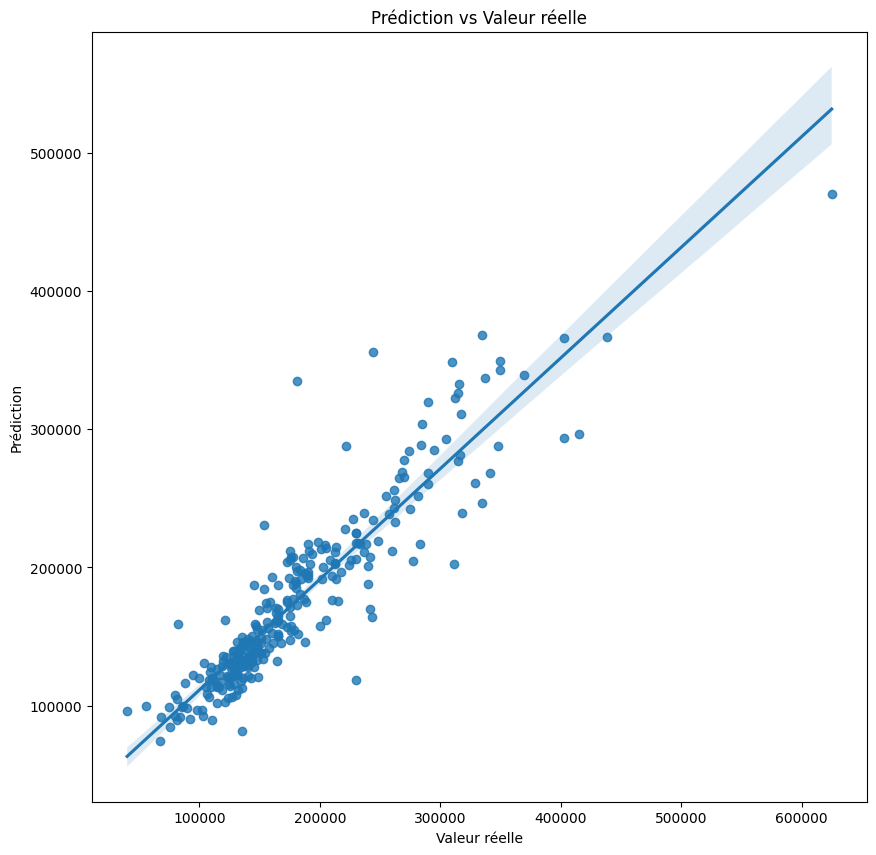

In [47]:
# Graphique entre la prédiction et la valeur réelle

# Taille du graphique
plt.figure(figsize=(10, 10))
sns.regplot(x=y_test, y=y_pred)
plt.xlabel('Valeur réelle')
plt.ylabel('Prédiction')
plt.title('Prédiction vs Valeur réelle')
plt.show()

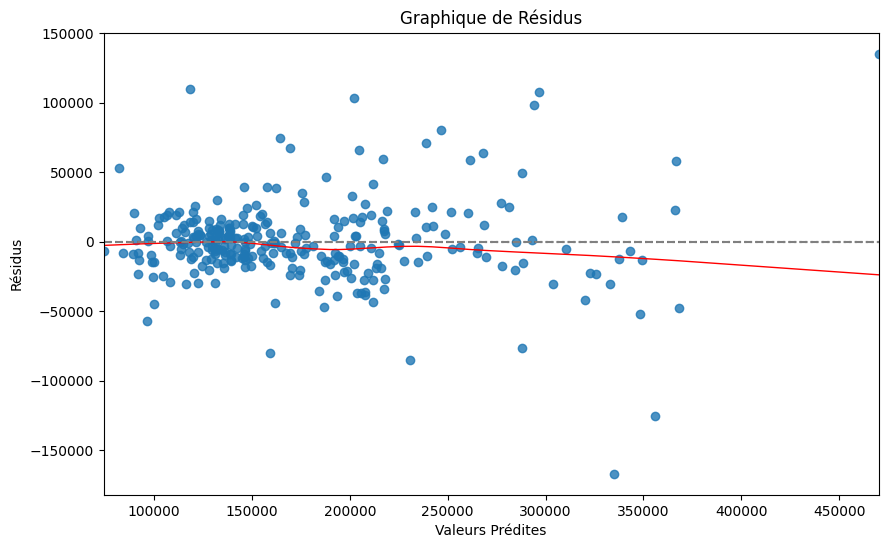

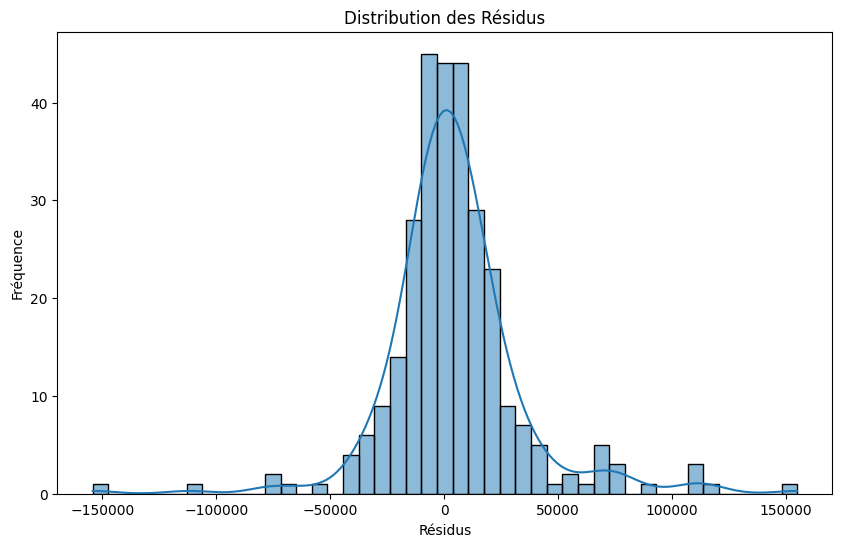

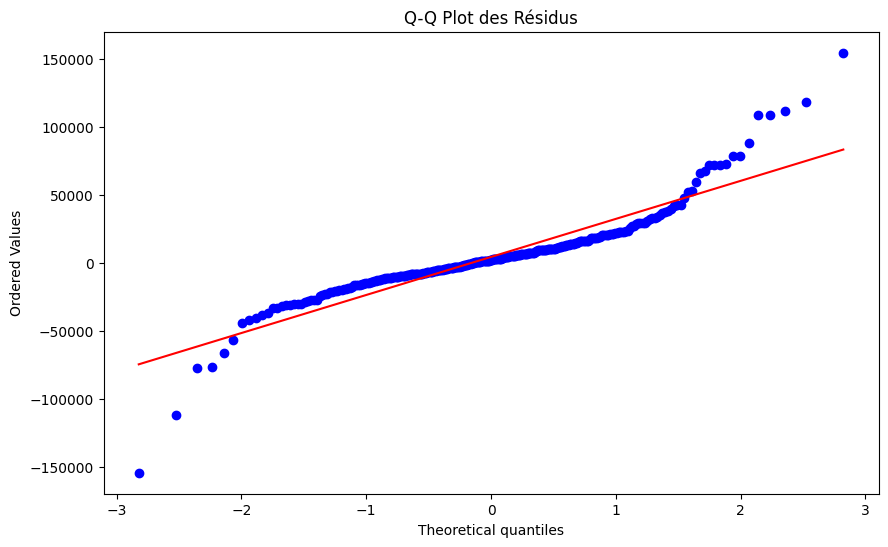

In [48]:
# Supposons que y_test sont vos valeurs réelles et y_pred sont les prédictions de votre modèle
residuals = y_test - y_pred

# Graphique de résidus
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.title('Graphique de Résidus')
plt.xlabel('Valeurs Prédites')
plt.ylabel('Résidus')
plt.axhline(y=0, color='grey', linestyle='--')
plt.show()

# Histogramme des résidus
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution des Résidus')
plt.xlabel('Résidus')
plt.ylabel('Fréquence')
plt.show()

# Q-Q plot des résidus
import scipy.stats as stats

plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot des Résidus')
plt.show()


In [49]:
# Application du modèle sur data2
# Sélectionner les colonnes numériques et catégorielles
numeric_features = data2.select_dtypes(include=['int64', 'float64']).columns
categorical_features = data2.select_dtypes(include=['object']).columns

# Convertir les données catégorielles en chaînes de caractères
for col in categorical_features:
    data2[col] = data2[col].astype(str)

# Prédire sur l'ensemble de test
y_pred2 = pipeline.predict(data2)

# Création du fichier de soumission
submission = pd.DataFrame({'Id': data2['Id'], 'SalePrice': y_pred2})

submission.to_csv(Path + 'submission Knn.csv', index=False)


## Normalisation de la base 

In [50]:
Pathdata = Path + 'train.csv'
data = pd.read_csv(Pathdata)

# Transforme certaines colonnes en catégorie : YearBuilt, YearRemodAdd, MoSold, YrSold, GarageYrBlt
data['YearBuilt'] = data['YearBuilt'].astype('object')
data['YearRemodAdd'] = data['YearRemodAdd'].astype('object')
data['MoSold'] = data['MoSold'].astype('object')
data['YrSold'] = data['YrSold'].astype('object')
data['GarageYrBlt'] = data['GarageYrBlt'].astype('object')

# Ajustement de la base
data['Alley'] = data['Alley'].fillna('No alley')
data['BsmtQual'] = data['BsmtQual'].fillna('No Basement')
data['BsmtCond'] = data['BsmtCond'].fillna('No Basement')
data['BsmtExposure'] = data['BsmtExposure'].fillna('No Basement')
data['BsmtFinType1'] = data['BsmtFinType1'].fillna('No Basement')
data['BsmtFinType2'] = data['BsmtFinType2'].fillna('No Basement')
data['FireplaceQu'] = data['FireplaceQu'].fillna('No Fireplace')
data['GarageType'] = data['GarageType'].fillna('No Garage')
data['GarageFinish'] = data['GarageFinish'].fillna('No Garage')
data['GarageQual'] = data['GarageQual'].fillna('No Garage')
data['GarageCond'] = data['GarageCond'].fillna('No Garage')
data['GarageYrBlt'] = data['GarageYrBlt'].fillna('No Garage')
data['PoolQC'] = data['PoolQC'].fillna('No Pool')
data['Fence'] = data['Fence'].fillna('No Fence')
data['MiscFeature'] = data['MiscFeature'].fillna('No feature')
data['LotFrontage'] = data['LotFrontage'].fillna(0)
data['MasVnrType'] = data['MasVnrType'].fillna('No veneer')

# Affiche la taille de la base
print(data.shape)

# drop les lignes avec des valeurs manquantes
data = data.dropna()

# Affiche la taille de la base
print(data.shape)

data.dtypes

(1460, 81)
(1451, 81)


Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold            object
YrSold            object
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [51]:
Pathdata2 = Path + 'test.csv'
data2 = pd.read_csv(Pathdata2)

# Transforme certaines colonnes en catégorie : YearBuilt, YearRemodAdd, MoSold, YrSold, GarageYrBlt
data2['YearBuilt'] = data2['YearBuilt'].astype('object')
data2['YearRemodAdd'] = data2['YearRemodAdd'].astype('object')
data2['MoSold'] = data2['MoSold'].astype('object')
data2['YrSold'] = data2['YrSold'].astype('object')
data2['GarageYrBlt'] = data2['GarageYrBlt'].astype('object')

# Ajustement de la base
data2['Alley'] = data2['Alley'].fillna('No alley')
data2['BsmtQual'] = data2['BsmtQual'].fillna('No Basement')
data2['BsmtCond'] = data2['BsmtCond'].fillna('No Basement')
data2['BsmtExposure'] = data2['BsmtExposure'].fillna('No Basement')
data2['BsmtFinType1'] = data2['BsmtFinType1'].fillna('No Basement')
data2['BsmtFinType2'] = data2['BsmtFinType2'].fillna('No Basement')
data2['FireplaceQu'] = data2['FireplaceQu'].fillna('No Fireplace')
data2['GarageType'] = data2['GarageType'].fillna('No Garage')
data2['GarageFinish'] = data2['GarageFinish'].fillna('No Garage')
data2['GarageQual'] = data2['GarageQual'].fillna('No Garage')
data2['GarageCond'] = data2['GarageCond'].fillna('No Garage')
data2['GarageYrBlt'] = data2['GarageYrBlt'].fillna('No Garage')
data2['PoolQC'] = data2['PoolQC'].fillna('No Pool')
data2['Fence'] = data2['Fence'].fillna('No Fence')
data2['MiscFeature'] = data2['MiscFeature'].fillna('No feature')
data2['LotFrontage'] = data2['LotFrontage'].fillna(0)
data2['MasVnrType'] = data2['MasVnrType'].fillna('No veneer')

print(data2.shape)


(1459, 80)


In [52]:
# On sélectionne les colonnes numériques
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns

# On retire Id et SalePrice
numeric_features = numeric_features.drop(['Id', 'SalePrice'])

# On centre et on réduit les données
scaler = StandardScaler()
scaler.fit(data[numeric_features])
scaled = scaler.transform(data[numeric_features])

# On modifie data avec les données centrées et réduites
for i, col in enumerate(numeric_features):
    data[col] = scaled[:, i]

# Ici on centre et on réduit les données de data2

# On sélectionne les colonnes numériques
numeric_features = data2.select_dtypes(include=['int64', 'float64']).columns

# On retire Id
numeric_features = numeric_features.drop(['Id'])

# On centre et on réduit les données
scaler = StandardScaler()
scaler.fit(data2[numeric_features])
scaled = scaler.transform(data2[numeric_features])

# On modifie data avec les données centrées et réduites
for i, col in enumerate(numeric_features):
    data2[col] = scaled[:, i]



In [53]:
# Supposons que 'SalePrice' est votre variable cible
y = data['SalePrice']
X = data.drop(columns=['SalePrice'])

# Sélection des colonnes numériques et catégorielles
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

# Assurez-vous que toutes les colonnes catégorielles sont de type str
for col in cat_cols:
    X[col] = X[col].astype(str)

# Créer un impute pour les valeurs numériques et un autre pour les valeurs catégorielles
num_imputer = SimpleImputer(strategy='median')  # ou 'mean', selon votre choix
cat_imputer = SimpleImputer(strategy='most_frequent')

# Mettre à jour le ColumnTransformer pour inclure l'imputation
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([('imputer', num_imputer), ('scaler', StandardScaler())]), num_cols),
        ('cat', Pipeline([('imputer', cat_imputer), ('encoder', OneHotEncoder(handle_unknown='ignore'))]), cat_cols)
    ])

# Création du pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('knn', KNeighborsRegressor(n_neighbors=5))
])

# Division des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraînement du modèle
pipeline.fit(X_train, y_train)

# Prédiction et évaluation
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 919357344.8210309


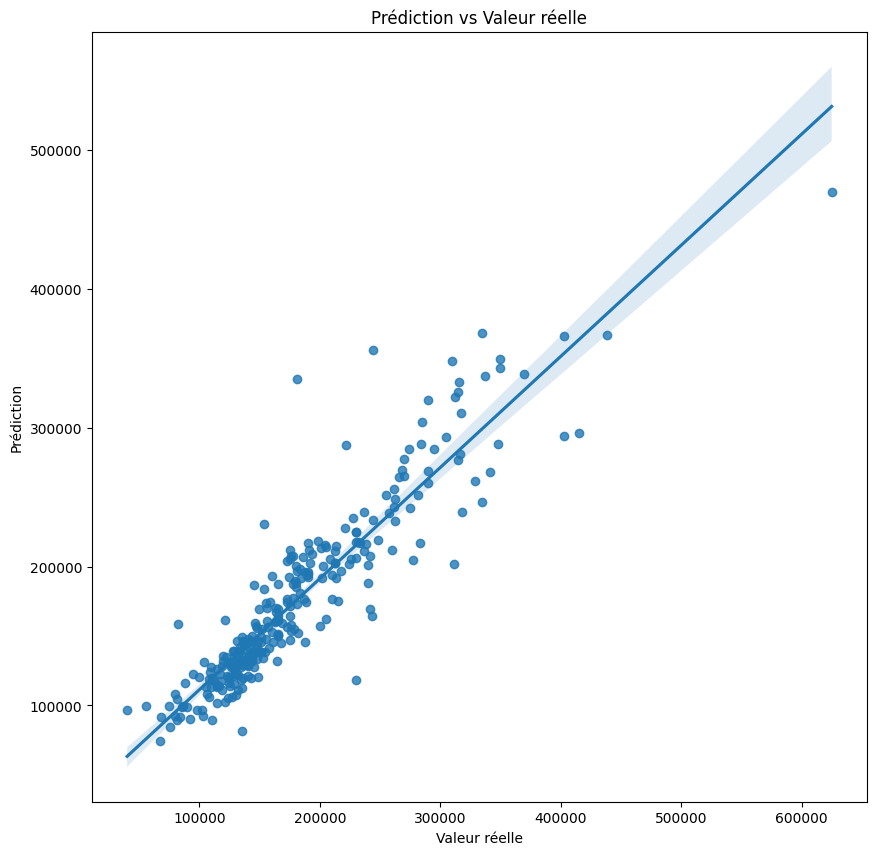

In [54]:
# Graphique entre la prédiction et la valeur réelle

# Taille du graphique
plt.figure(figsize=(10, 10))
sns.regplot(x=y_test, y=y_pred)
plt.xlabel('Valeur réelle')
plt.ylabel('Prédiction')
plt.title('Prédiction vs Valeur réelle')
plt.show()

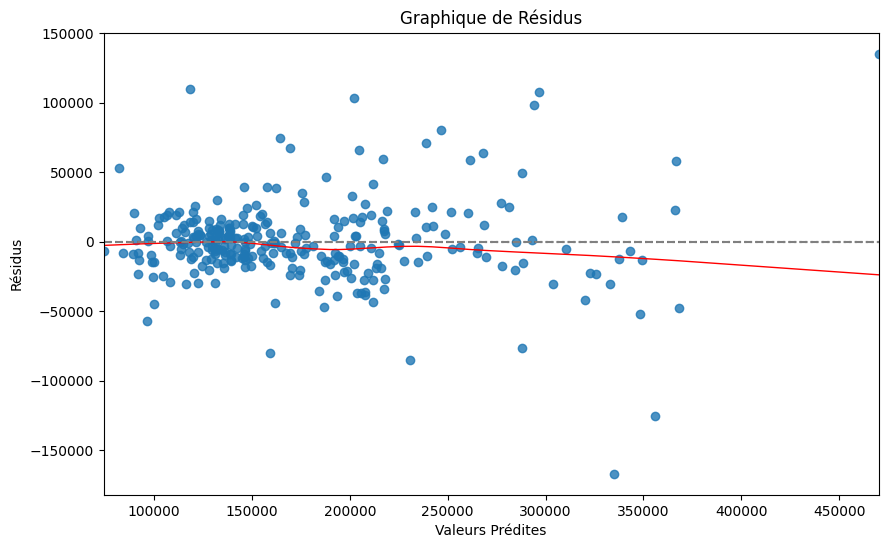

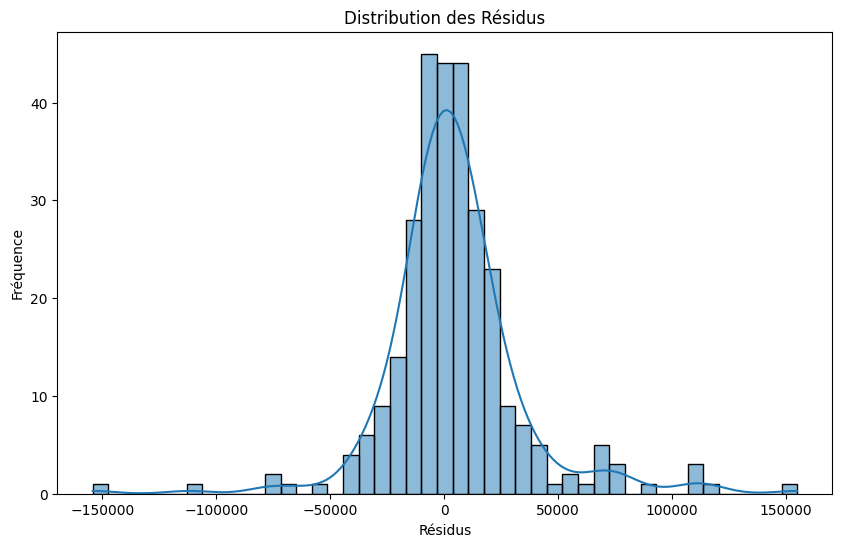

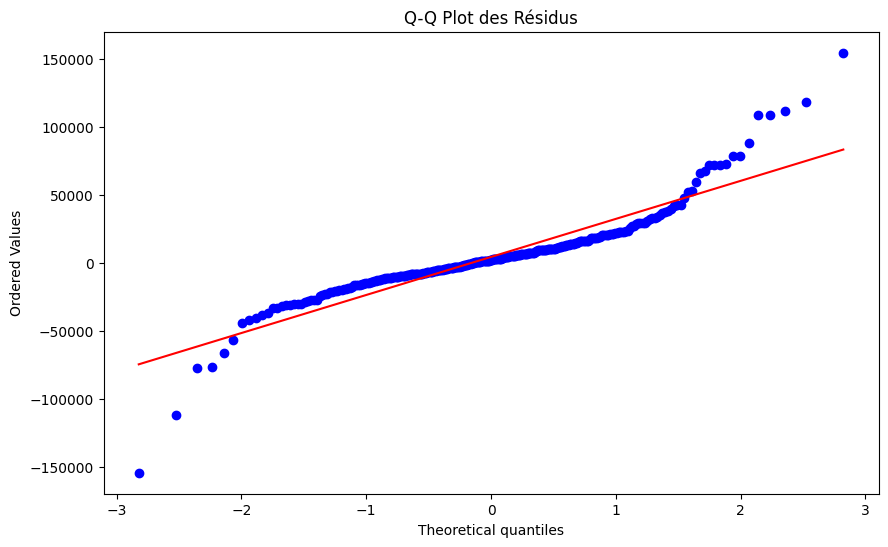

In [55]:
# Supposons que y_test sont vos valeurs réelles et y_pred sont les prédictions de votre modèle
residuals = y_test - y_pred

# Graphique de résidus
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.title('Graphique de Résidus')
plt.xlabel('Valeurs Prédites')
plt.ylabel('Résidus')
plt.axhline(y=0, color='grey', linestyle='--')
plt.show()

# Histogramme des résidus
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution des Résidus')
plt.xlabel('Résidus')
plt.ylabel('Fréquence')
plt.show()

# Q-Q plot des résidus
import scipy.stats as stats

plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot des Résidus')
plt.show()


In [56]:
# Application du modèle sur data2
# Sélectionner les colonnes numériques et catégorielles
numeric_features = data2.select_dtypes(include=['int64', 'float64']).columns
categorical_features = data2.select_dtypes(include=['object']).columns

# Convertir les données catégorielles en chaînes de caractères
for col in categorical_features:
    data2[col] = data2[col].astype(str)

# Prédire sur l'ensemble de test
y_pred2 = pipeline.predict(data2)

# Création du fichier de soumission
submission = pd.DataFrame({'Id': data2['Id'], 'SalePrice': y_pred2})

submission.to_csv(Path + 'submission Knn Stand.csv', index=False)


## Modification du nombre de voisin

In [57]:
# Supposons que 'SalePrice' est votre variable cible et 'data' est votre DataFrame
y = data['SalePrice']
X = data.drop(columns=['SalePrice'])

# Sélection des colonnes numériques et catégorielles
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

# Assurez-vous que toutes les colonnes catégorielles sont de type str
for col in cat_cols:
    X[col] = X[col].astype(str)

# Créer un impute pour les valeurs numériques et un autre pour les valeurs catégorielles
num_imputer = SimpleImputer(strategy='median')  # ou 'mean', selon votre choix
cat_imputer = SimpleImputer(strategy='most_frequent')

# Mettre à jour le ColumnTransformer pour inclure l'imputation
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([('imputer', num_imputer), ('scaler', StandardScaler())]), num_cols),
        ('cat', Pipeline([('imputer', cat_imputer), ('encoder', OneHotEncoder(handle_unknown='ignore'))]), cat_cols)
    ])

# Création du pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('knn', KNeighborsRegressor())
])

# Paramètres pour GridSearchCV
param_grid = {
    'knn__n_neighbors': range(1, 16)  # Exemple de valeurs à tester
}

# Création du modèle GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')

# Division des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraînement avec GridSearchCV
grid_search.fit(X_train, y_train)

# Affichage du meilleur nombre de voisins
best_n_neighbors = grid_search.best_params_['knn__n_neighbors']
print("Meilleur nombre de voisins:", best_n_neighbors)

# Utiliser le meilleur modèle pour prédire
y_pred = grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error avec le meilleur n_neighbors:", mse)

Meilleur nombre de voisins: 13
Mean Squared Error avec le meilleur n_neighbors: 990900402.2060027


In [58]:
# Supposons que 'SalePrice' est votre variable cible
y = data['SalePrice']
X = data.drop(columns=['SalePrice'])

# Sélection des colonnes numériques et catégorielles
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

# Assurez-vous que toutes les colonnes catégorielles sont de type str
for col in cat_cols:
    X[col] = X[col].astype(str)

# Créer un impute pour les valeurs numériques et un autre pour les valeurs catégorielles
num_imputer = SimpleImputer(strategy='median')  # ou 'mean', selon votre choix
cat_imputer = SimpleImputer(strategy='most_frequent')

# Mettre à jour le ColumnTransformer pour inclure l'imputation
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([('imputer', num_imputer), ('scaler', StandardScaler())]), num_cols),
        ('cat', Pipeline([('imputer', cat_imputer), ('encoder', OneHotEncoder(handle_unknown='ignore'))]), cat_cols)
    ])

# Création du pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('knn', KNeighborsRegressor(n_neighbors=13))
])

# Division des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraînement du modèle
pipeline.fit(X_train, y_train)

# Prédiction et évaluation
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 990900402.2060027


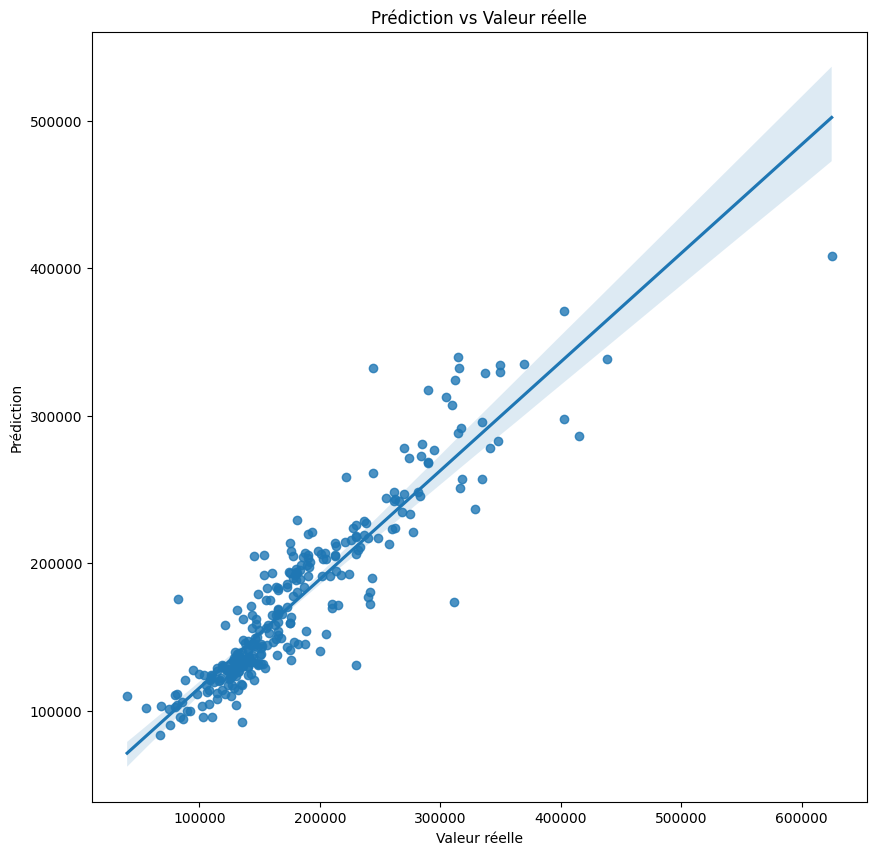

In [59]:
# Graphique entre la prédiction et la valeur réelle

# Taille du graphique
plt.figure(figsize=(10, 10))
sns.regplot(x=y_test, y=y_pred)
plt.xlabel('Valeur réelle')
plt.ylabel('Prédiction')
plt.title('Prédiction vs Valeur réelle')
plt.show()

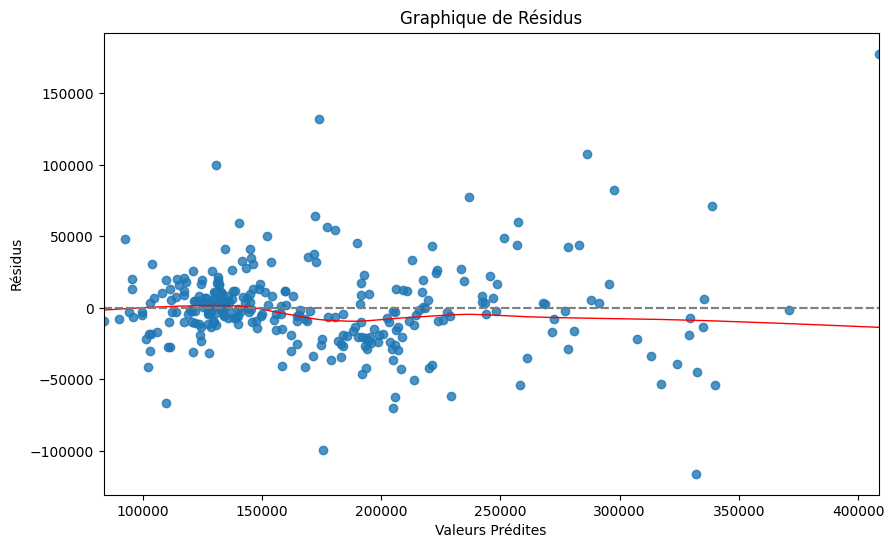

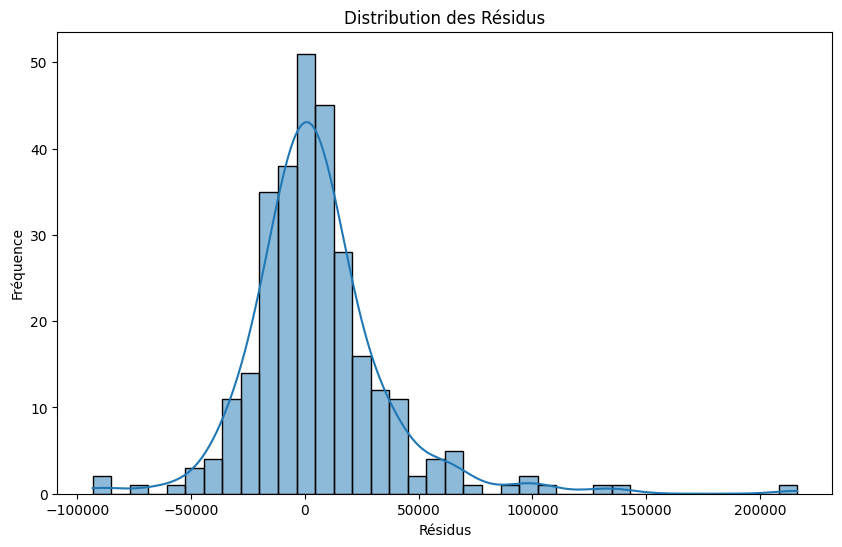

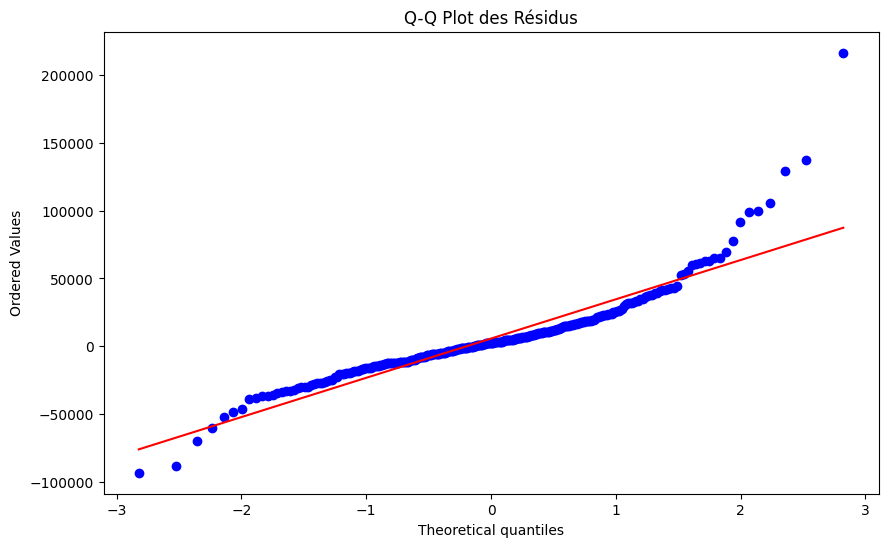

In [60]:
# Supposons que y_test sont vos valeurs réelles et y_pred sont les prédictions de votre modèle
residuals = y_test - y_pred

# Graphique de résidus
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.title('Graphique de Résidus')
plt.xlabel('Valeurs Prédites')
plt.ylabel('Résidus')
plt.axhline(y=0, color='grey', linestyle='--')
plt.show()

# Histogramme des résidus
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution des Résidus')
plt.xlabel('Résidus')
plt.ylabel('Fréquence')
plt.show()

# Q-Q plot des résidus
import scipy.stats as stats

plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot des Résidus')
plt.show()


In [61]:
# Application du modèle sur data2
# Sélectionner les colonnes numériques et catégorielles
numeric_features = data2.select_dtypes(include=['int64', 'float64']).columns
categorical_features = data2.select_dtypes(include=['object']).columns

# Convertir les données catégorielles en chaînes de caractères
for col in categorical_features:
    data2[col] = data2[col].astype(str)

# Prédire sur l'ensemble de test
y_pred2 = pipeline.predict(data2)

# Création du fichier de soumission
submission = pd.DataFrame({'Id': data2['Id'], 'SalePrice': y_pred2})

submission.to_csv(Path + 'submission Knn Stand et para.csv', index=False)
